<a href="https://colab.research.google.com/github/tiago369/Desafios_de_computer_vision/blob/main/Desafio_2_Visao_Computacional_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 
import numpy as np 
from skimage import io 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (26.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [136]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [239]:
path = '/content/gdrive/MyDrive/Colab Notebooks'


img1 = io.imread(path + '/img1.jpeg')
img2 = io.imread(path + '/img2.jpeg')
img3 = io.imread(path + '/img3.jpeg')

img1R = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2R = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3R = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

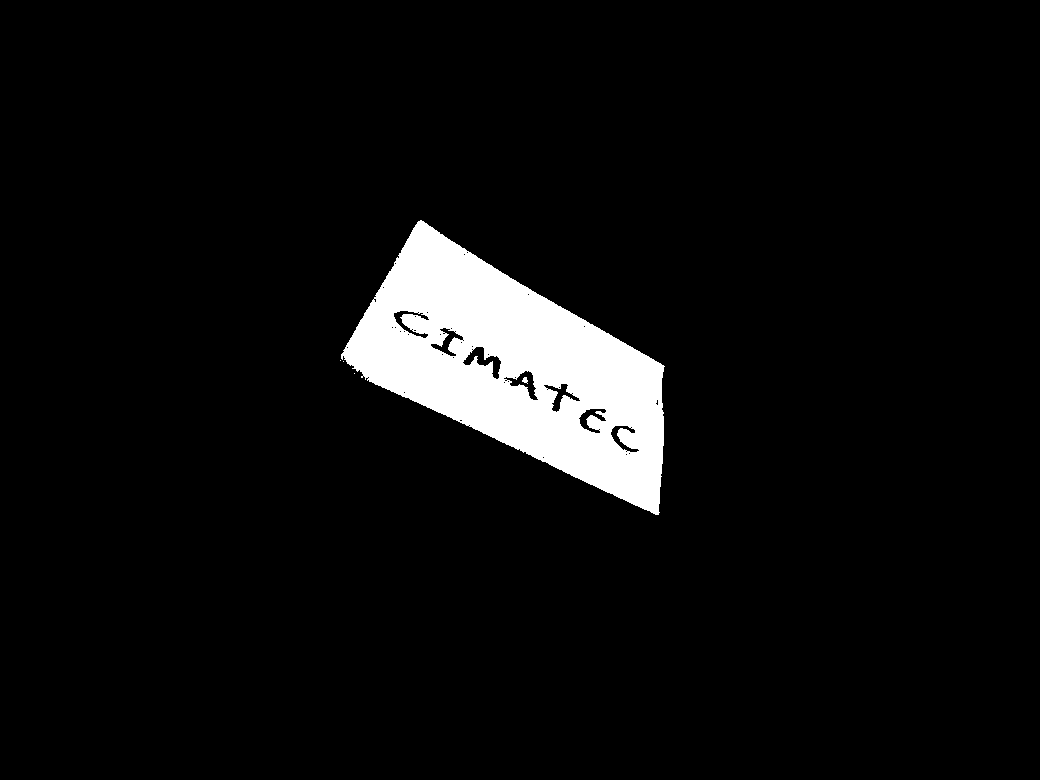

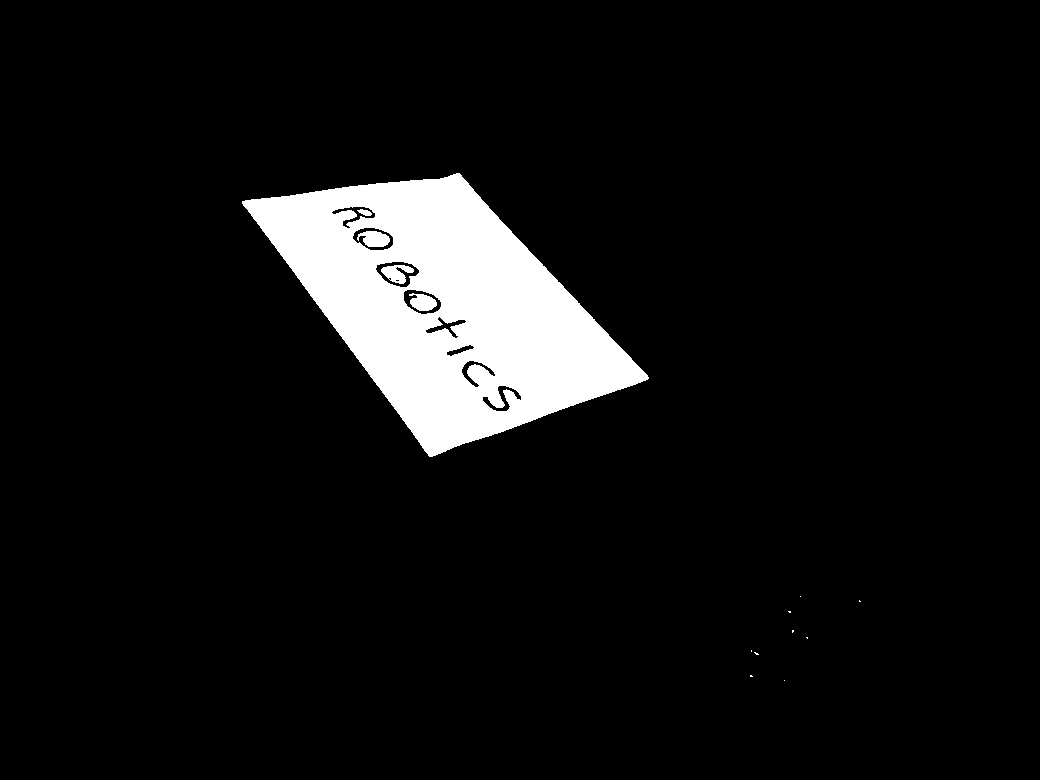

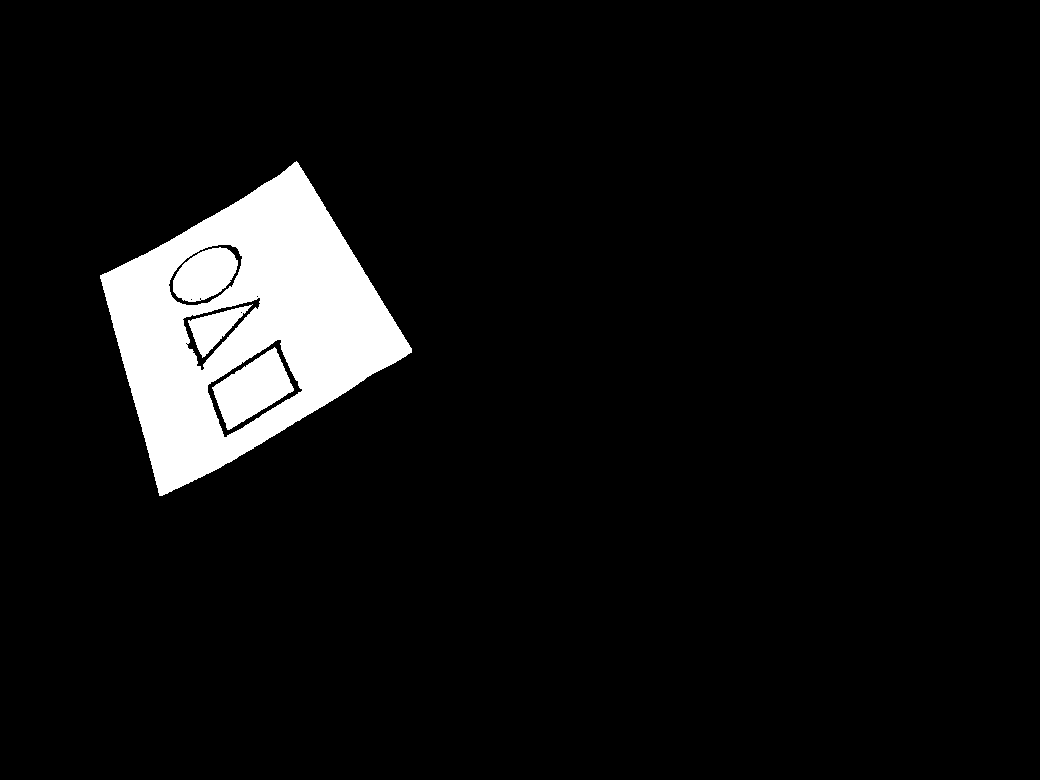

In [240]:
img1G = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2G = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3G = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

min = 175
max = 255

mask1 =cv2.inRange(img1G, min, max)
cv2_imshow(mask1)

mask2 =cv2.inRange(img2G, min, max)
cv2_imshow(mask2)

mask3 =cv2.inRange(img3G, min, max)
cv2_imshow(mask3)

In [241]:
#funçoes que percorrem a imagem e retorna posiçoes
def findWhiteVHS(img):
  a = img.shape[0]
  l = img.shape[1]
  for i in range(0, a, 1):
    for j in range(0, l, 1):
      #print(img[i,j])
      if(np.all(img[i,j] > 200)):
        return (j, i)


def findWhiteVHI(img):
  a = img.shape[0]
  l = img.shape[1]
  for i in range(a-1, -1, -1):
    for j in range(l-1, -1, -1):
      if(np.all(img[i,j] > 200)):
        return (j, i)


def findWhiteVVS(img):
  a = img.shape[0]
  l = img.shape[1]
  for j in range(0, l, 1):
    for i in range(0, a, 1):
      if(np.all(img[i,j] > 200)):
        return (j, i)

def findWhiteVVI(img):
  a = img.shape[0]
  l = img.shape[1]
  for j in range(l-1, -1, -1):
    for i in range(a-1, -1, -1):
      if(np.all(img[i,j] > 200)):
        return (j, i)

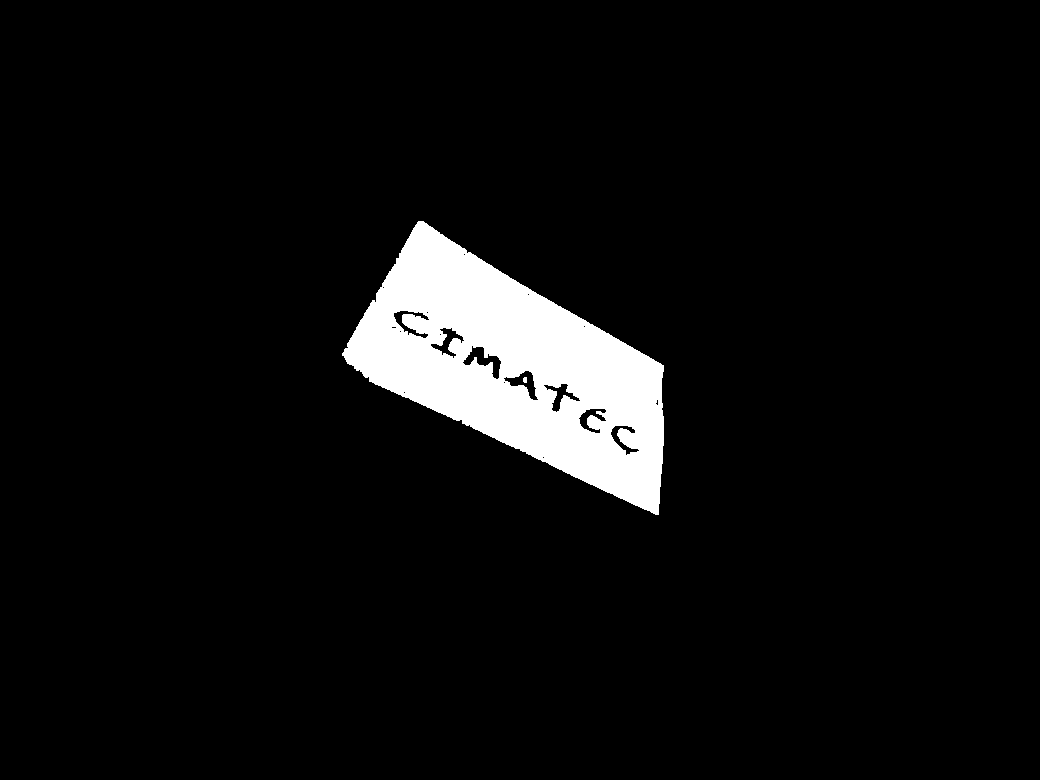

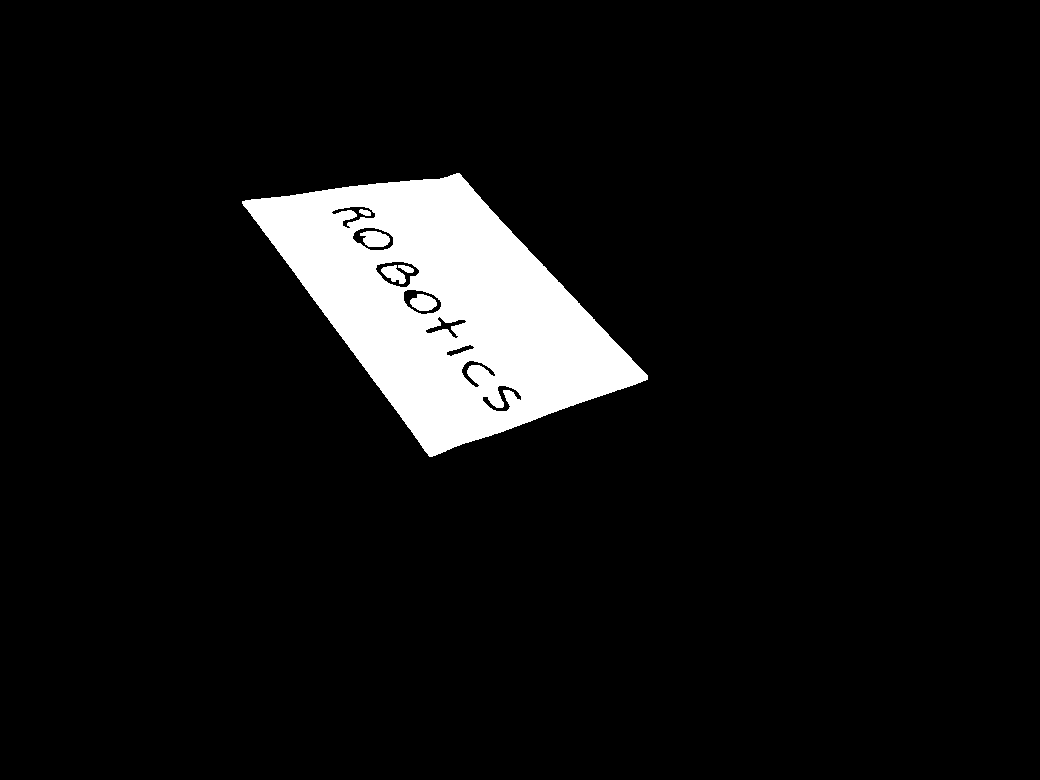

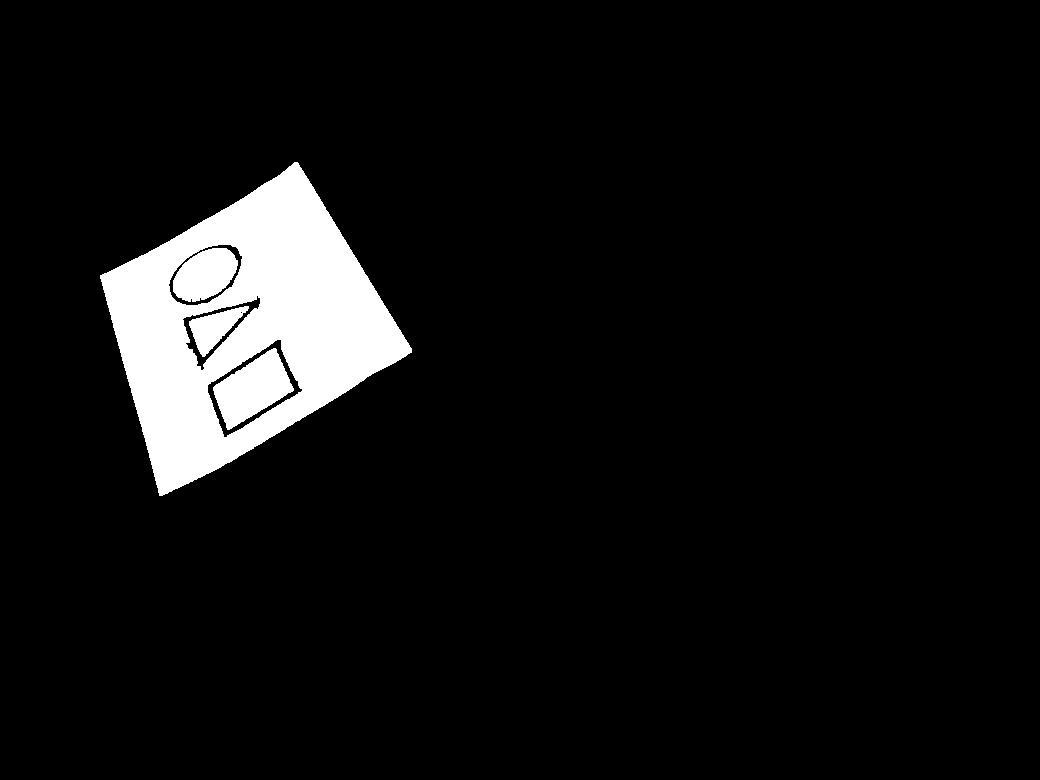

In [242]:
#--------------------------------------
kernel = np.ones((3,3),np.uint8)

mask1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel)
mask2 = cv2.morphologyEx(mask2, cv2.MORPH_OPEN, kernel)
mask3 = cv2.morphologyEx(mask3, cv2.MORPH_OPEN, kernel)

cv2_imshow(mask1)
cv2_imshow(mask2)
cv2_imshow(mask3)

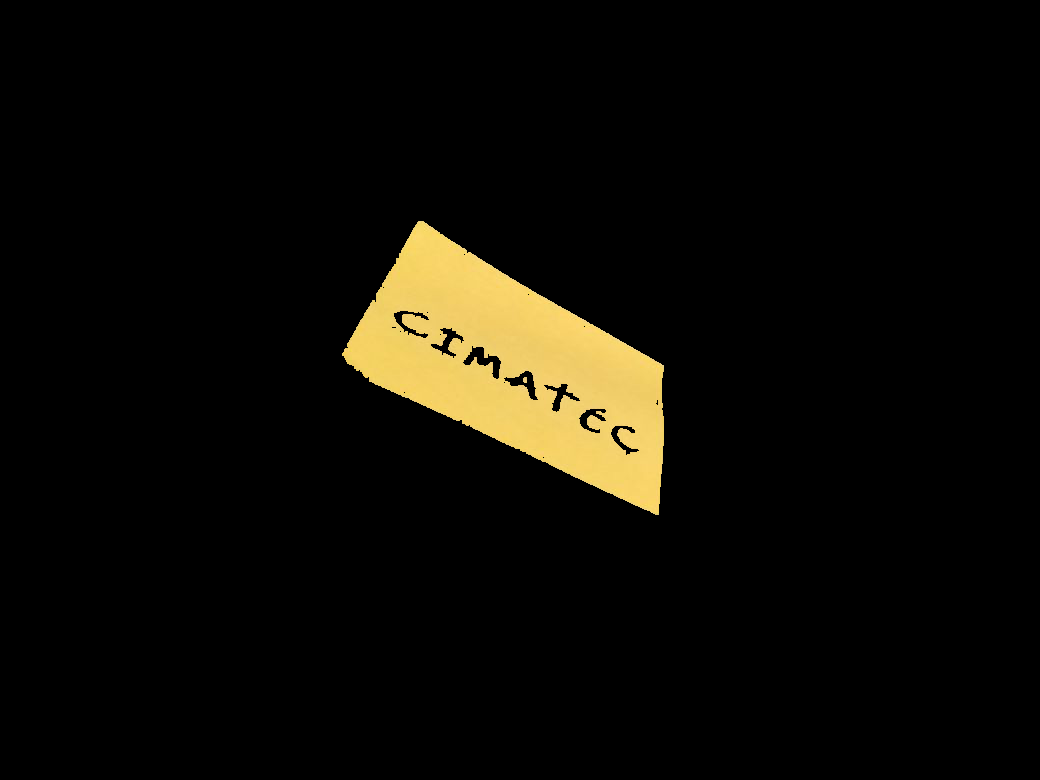

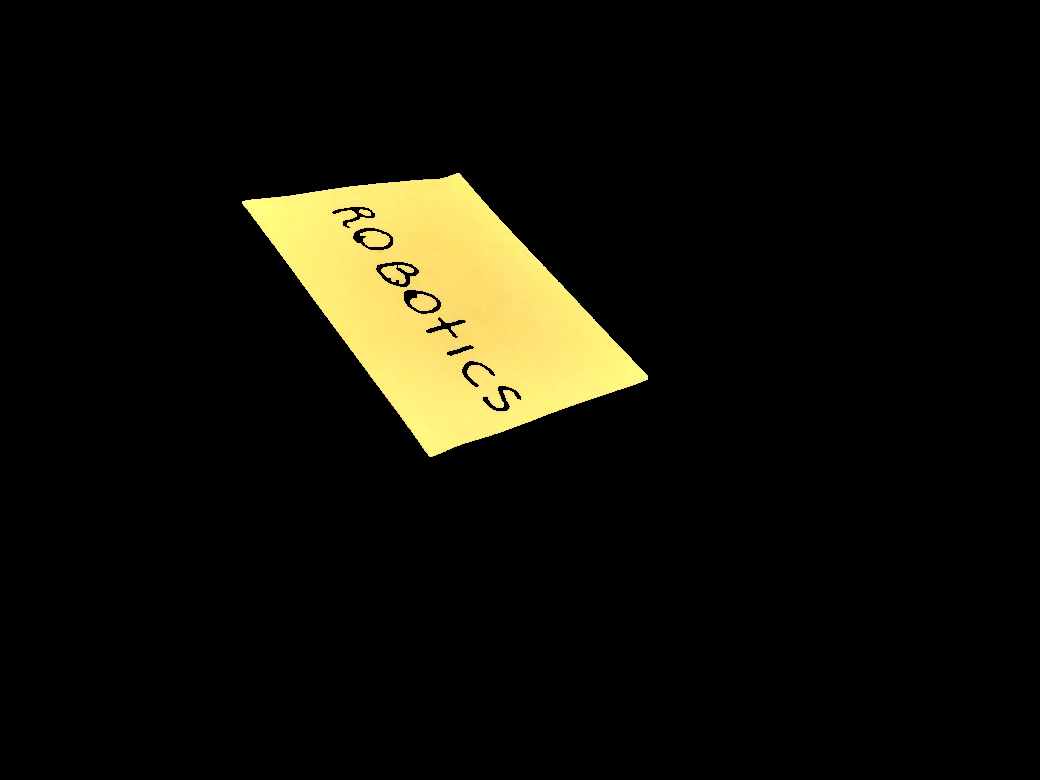

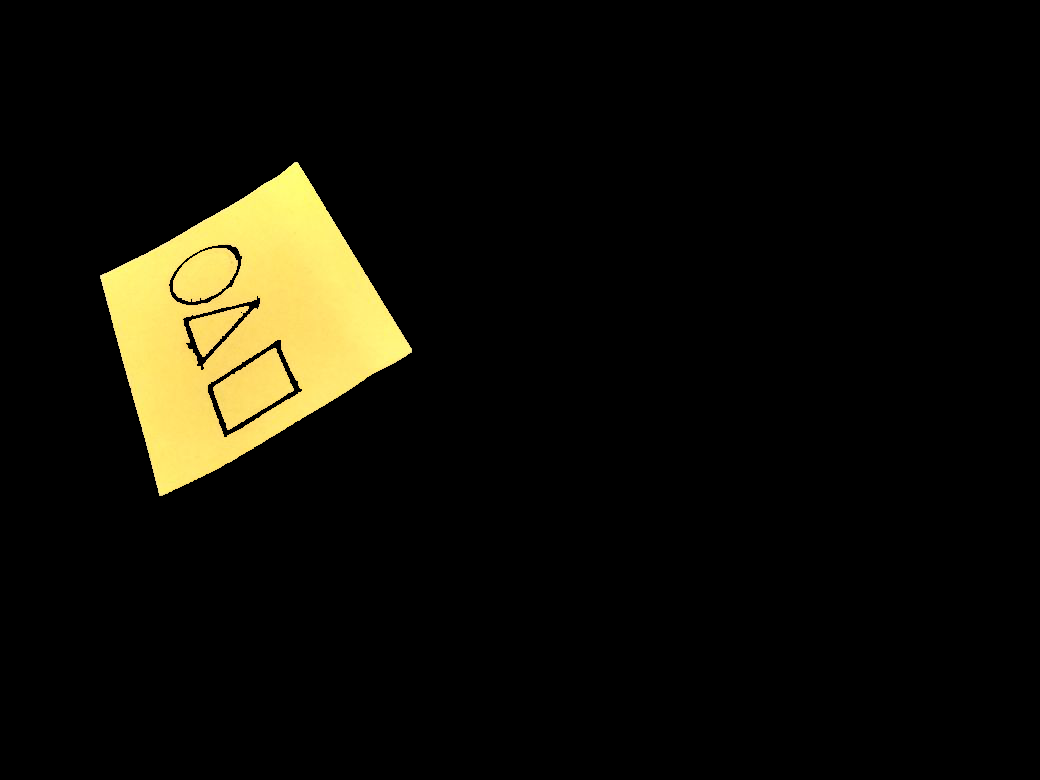

In [243]:
imgResult1 = cv2.bitwise_and(img1R,img1R,mask=mask1)
imgResult2 = cv2.bitwise_and(img2R,img2R,mask=mask2)
imgResult3 = cv2.bitwise_and(img3R,img3R,mask=mask3)

cv2_imshow(imgResult1)
cv2_imshow(imgResult2)
cv2_imshow(imgResult3)

**Imagem 1:**

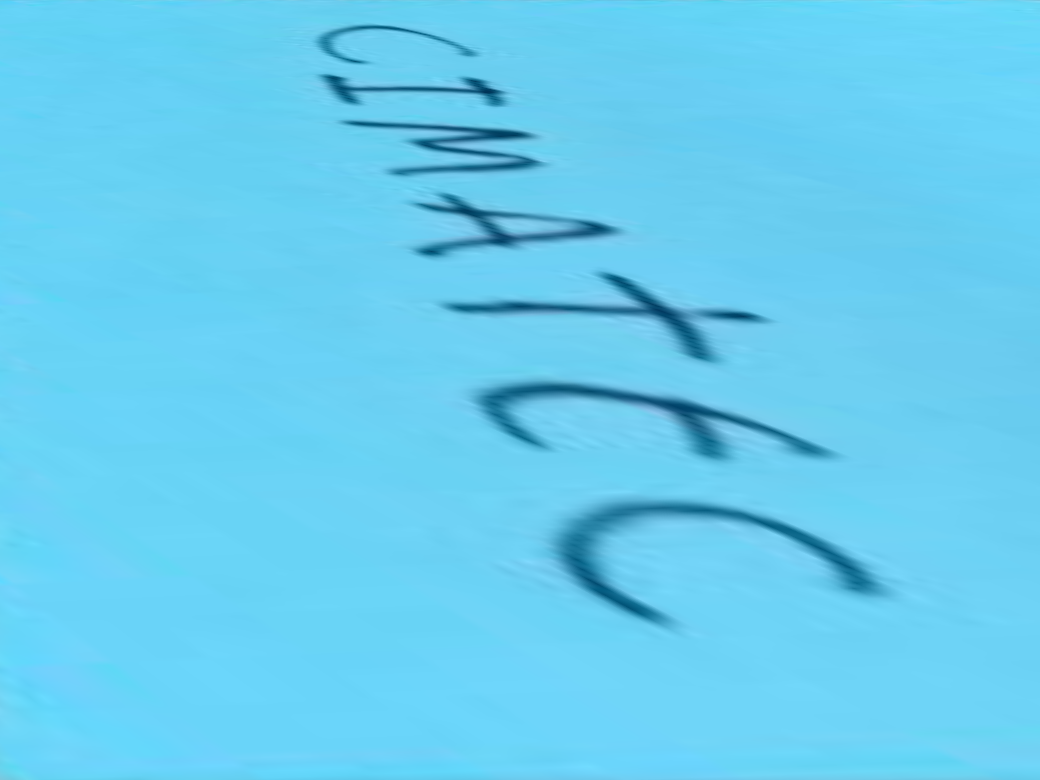

In [244]:
width = img1.shape[1]
height = img1.shape[0]

# Coordenadas atuais dos 4 vértices
pts1 = np.float32([findWhiteVVS(mask1), findWhiteVHS(mask1), findWhiteVHI(mask1),findWhiteVVI(mask1)])

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Matriz de Transformação de Perspectiva
matrix = cv2.getPerspectiveTransform(pts1,pts2)

# Distorção de Perspectiva
imgOutput1 = cv2.warpPerspective(img1,matrix,(width,height))

# Imprime a placa
cv2_imshow(imgOutput1)


**Imagem 2:**

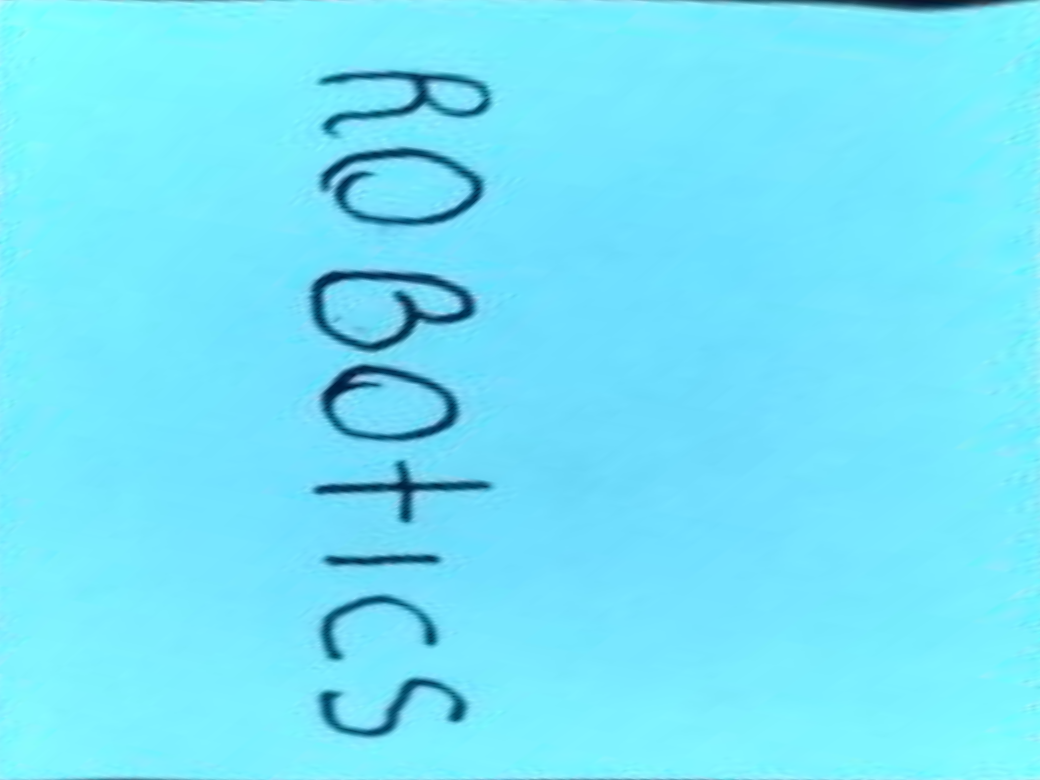

In [245]:
width = img1.shape[1]
height = img1.shape[0]

# Coordenadas atuais dos 4 vértices
pts1 = np.float32([findWhiteVVS(mask2), findWhiteVHS(mask2), findWhiteVHI(mask2),findWhiteVVI(mask2)])

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Matriz de Transformação de Perspectiva
matrix = cv2.getPerspectiveTransform(pts1,pts2)

# Distorção de Perspectiva
imgOutput2 = cv2.warpPerspective(img2,matrix,(width,height))

# Imprime a placa
cv2_imshow(imgOutput2)


**Imagem 3:**

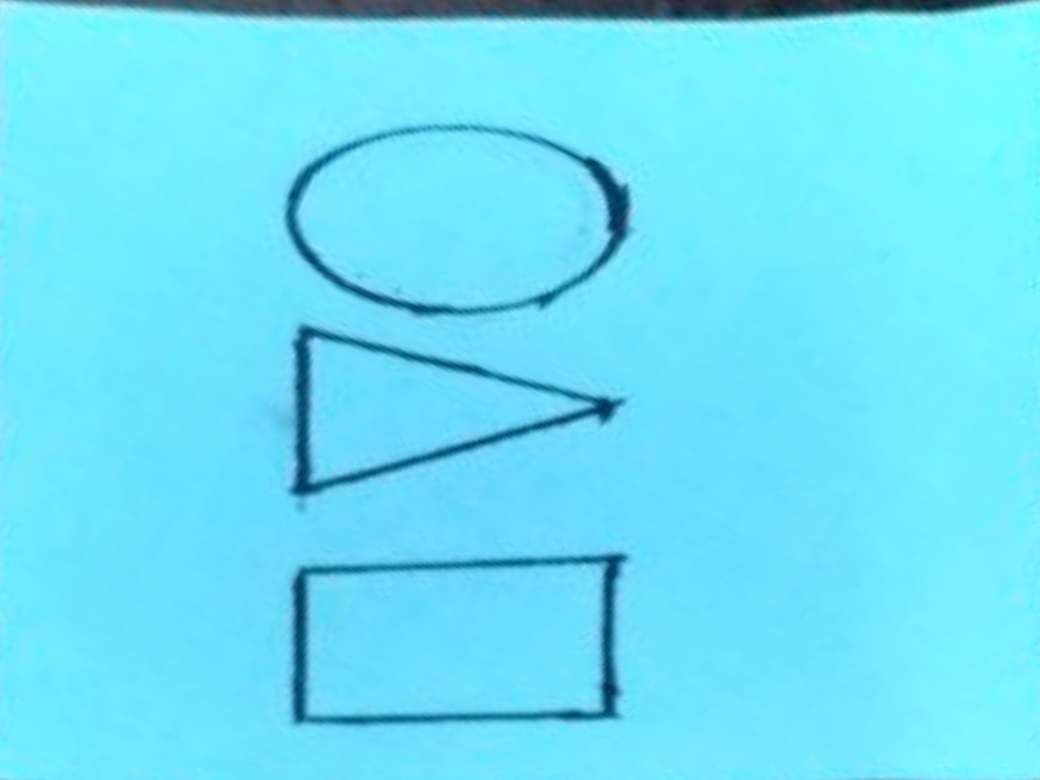

In [246]:
width = img1.shape[1]
height = img1.shape[0]

# Coordenadas atuais dos 4 vértices
pts1 = np.float32([findWhiteVVS(mask3), findWhiteVHS(mask3), findWhiteVHI(mask3),findWhiteVVI(mask3)])

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Matriz de Transformação de Perspectiva
matrix = cv2.getPerspectiveTransform(pts1,pts2)

# Distorção de Perspectiva
imgOutput3 = cv2.warpPerspective(img3,matrix,(width,height))

# Imprime a placa
cv2_imshow(imgOutput3)